<a href="https://colab.research.google.com/github/sakaimo/amon2-app/blob/master/python/NRR%E7%AE%97%E5%87%BA%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.楽楽販売からDLしたCSVの処理

* MONI: [ここ](https://hdsilver.htdb.jp/rvgvj8a/top/index/urlparams/JTJGcnZndmo4YSUyRjMlMkZkYmdJZCUyRjEwMDA0NyUyRmRiU2NoZW1hSWQlMkYxMDA3NjglMkZtZW51SWQlMkYxMDY0MDklMkZyZWNvcmRJZCUyRg%3D%3D)
* SAS: [ここ](https://hdsilver.htdb.jp/rvgvj8a/top/index/urlparams/JTJGcnZndmo4YSUyRjMlMkZkYmdJZCUyRjEwMDA1NyUyRmRiU2NoZW1hSWQlMkYxMDEyMjMlMkZtZW51SWQlMkYxMDY0MTElMkZyZWNvcmRJZCUyRg%3D%3D)
* FS: [ここ](https://hdsilver.htdb.jp/rvgvj8a/top/index/urlparams/JTJGcnZndmo4YSUyRjMlMkZkYmdJZCUyRjEwMDExNSUyRmRiU2NoZW1hSWQlMkYxMDI4MjMlMkZtZW51SWQlMkYxMDY0MTMlMkZyZWNvcmRJZCUyRg%3D%3D)
* hitobo: [ここ](https://hdsilver.htdb.jp/rvgvj8a/top/index/urlparams/JTJGcnZndmo4YSUyRjMlMkZkYmdJZCUyRjEwMDEyMiUyRmRiU2NoZW1hSWQlMkYxMDMxNzMlMkZtZW51SWQlMkYxMDY0MTAlMkZyZWNvcmRJZCUyRg%3D%3D)
* SG: [ここ](https://hdsilver.htdb.jp/rvgvj8a/top/index/urlparams/JTJGcnZndmo4YSUyRjMlMkZkYmdJZCUyRjEwMDEwMCUyRmRiU2NoZW1hSWQlMkYxMDE5OTElMkZtZW51SWQlMkYxMDY0MTQlMkZyZWNvcmRJZCUyRg%3D%3D)

から「対象月」で「2021年1月」以降を指定してCSVをDL。<br>
ファイル名をそれぞれ「moni.csv」「sas.csv」「fs.csv」「hitobo.csv」「sg.csv」にする

ダウンロードしたCSVは [このフォルダ](https://drive.google.com/drive/folders/1G7ZJmUXtMXu9x5lo2iXIQdfdlAciJqw3) に入れる。同名ファイルは上書きしてください。

## ドライブをマウント


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd

Mounted at /content/drive


## SG以外のCSV読み込み→処理→出力

ファイルにSJISにはなくてCP932にはある拡張文字がある → cp932 ならいける


In [ ]:
# MONI
moni_df = pd.read_csv("/content/drive/Shareddrives/BI推進部/NRR算出/元データCSV/moni.csv",encoding="cp932")
moni_columns=["対象月","取引先名","案件種別","案件名","計上部署","請求額","プロダクト名","案件マスタID","案件マスタ名","案件ID","明細ID","運用ステータス","開始日","終了日","取引先ID"]

for column in moni_columns:
    if column not in moni_df.columns:
        raise ValueError(f"csvに[{column}]のカラム名が存在しません")

moni_df = moni_df.rename(columns={"対象月": "対象年月"})

moni_df["対象年月"] = pd.to_datetime(moni_df["対象年月"])
moni_df["開始日"] = pd.to_datetime(moni_df["開始日"], format="%Y年%m月%d日")
moni_df["終了日"] = pd.to_datetime(moni_df["終了日"], format="%Y年%m月%d日")

In [ ]:
# SAS
sas_df = pd.read_csv("/content/drive/Shareddrives/BI推進部/NRR算出/元データCSV/sas.csv",encoding='cp932')
sas_columns = ["対象月","取引先名","案件種別","案件名","計上部署","請求金額","商品名","案件マスタID","案件マスタ名","案件ID","明細ID","運用ステータス","開始日","終了日","取引先ID"]
for column in sas_columns:
    if column not in sas_df.columns:
        raise ValueError(f"csvに[{column}]のカラム名が存在しません")
sas_df = sas_df.rename(columns={"請求金額": "請求額", "対象月": "対象年月"})

sas_df["対象年月"] = pd.to_datetime(sas_df["対象年月"])
sas_df["開始日"] = pd.to_datetime(sas_df["開始日"])
sas_df["終了日"] = pd.to_datetime(sas_df["終了日"])

In [ ]:
# FS
fs_df = pd.read_csv("/content/drive/Shareddrives/BI推進部/NRR算出/元データCSV/fs.csv",encoding='cp932')
fs_columns = ["対象月","取引先名","案件種別","案件名","計上部署","サービス金額","サービス名","案件マスタID","案件マスタ名","案件ID","明細ID","運用ステータス","開始日","終了日","取引先ID"]
for column in fs_columns:
    if column not in fs_df.columns:
        raise ValueError(f"csvに[{column}]のカラム名が存在しません")
fs_df = fs_df.rename(columns={"サービス金額": "請求額", "対象月": "対象年月"})

fs_df["対象年月"] = pd.to_datetime(fs_df["対象年月"])
fs_df["開始日"] = pd.to_datetime(fs_df["開始日"])
fs_df["終了日"] = pd.to_datetime(fs_df["終了日"])

In [ ]:
# hitobo
ht_df = pd.read_csv("/content/drive/Shareddrives/BI推進部/NRR算出/元データCSV/hitobo.csv",encoding='cp932')
ht_columns = ["対象月","取引先名","案件種別","案件名","計上部署","月額費用","商品名","案件ID","明細ID","運用ステータス","開始日","終了日","取引先ID"]
for column in ht_columns:
    if column not in ht_df.columns:
        raise ValueError(f"csvに[{column}]のカラム名が存在しません")
ht_df = ht_df.rename(columns={"月額費用": "請求額", "対象月": "対象年月"})

ht_df["対象年月"] = pd.to_datetime(ht_df["対象年月"])
ht_df["開始日"] = pd.to_datetime(ht_df["開始日"])
ht_df["終了日"] = pd.to_datetime(ht_df["終了日"])

In [ ]:
# 縦に結合
rakuraku_df = pd.concat([moni_df, sas_df, fs_df, ht_df],  axis=0, ignore_index=True)

# 案件種別をランニングだけ
rakuraku_df = rakuraku_df[rakuraku_df["案件種別"] == "ランニング"]

# 請求額の欠損値をゼロ埋め
rakuraku_df = rakuraku_df.fillna({"請求額":0})

# 欠損チェック (やっつけ)
a = rakuraku_df["対象年月"].isnull().sum()
b = rakuraku_df["請求額"].isnull().sum()
c = rakuraku_df["取引先ID"].isnull().sum()
d = rakuraku_df["案件ID"].isnull().sum()
if a+b+c+d > 0:
  raise ValueError("必須項目に空欄がある")

In [ ]:
# CSVに出力
rakuraku_df.to_csv("/content/drive/Shareddrives/BI推進部/NRR算出/加工済データCSV/SG以外_rakuraku.csv", index=False)
rakuraku_df

,対象年月,取引先名,案件種別,案件名,計上部署,請求額,プロダクト名,案件マスタID,案件マスタ名,案件ID,明細ID,運用ステータス,開始日,終了日,取引先ID,移行先案件ID,商品名,サービス名
0,2023-08-01,株式会社クレハ,ランニング,株式会社クレハ_Pazu,SPY,40000.0,NaN,MONI-Service-M-000000240,株式会社クレハ_Pazu,OMD-Service-000001824,OMD-Report-0040000,運用中（15日締請求案件）,2022-04-01,NaT,C-00014906,NaN,NaN,NaN
1,2023-07-01,株式会社TRUSTDOCK,ランニング,TRUSTDOCK_ヤフオク!・PayPayフリマ_本人確認業務,MONI,6104770.0,TRUSTDOCK,MONI-Service-M-000000182,ヤフオク!・PayPayフリマ,OMD-Service-000002079,OMD-Report-0039958,運用中（TRUSTDOCK）,2023-01-01,NaT,C-00017126,NaN,NaN,NaN
2,2023-07-01,株式会社TRUSTDOCK,ランニング,DOG HUGGY TRUSTDOCK（健康保険証マスキング状態確認）,MONI,1364.0,TRUSTDOCK,MONI-Service-M-000000263,DOG HUGGY TRUSTDOCK(マスキング業務),OMD-Service-000001692,OMD-Report-0039957,運用中（TRUSTDOCK）,2021-07-30,NaT,C-00017126,NaN,NaN,NaN
3,2023-07-01,株式会社TRUSTDOCK,ランニング,DOG HUGGY TRUSTDOCK（健康保険証マスキング）,MONI,16.0,TRUSTDOCK,MONI-Service-M-000000263,DOG HUGGY TRUSTDOCK(マスキング業務),OMD-Service-000001694,OMD-Report-0039956,運用中（TRUSTDOCK）,2021-07-30,NaT,C-00017126,NaN,NaN,NaN
4,2023-07-01,株式会社TRUSTDOCK,ランニング,DOG HUGGY TRUSTDOCK,MONI,10260.0,TRUSTDOCK,MONI-Service-M-000000016,DOG HUGGY TRUSTDOCK,OMD-Service-000000903,OMD-Report-0039955,運用中（TRUSTDOCK）,2017-05-15,NaT,C-00017126,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30956,2021-01-01,IMV株式会社,ランニング,IMV株式会社,HT,0.0,NaN,NaN,NaN,HTB_Project_000034,HTB_Report_000631,終了,2020-10-01,2021-03-31,C-00017330,NaN,hitoboスタンダード,NaN
30957,2021-01-01,トレンドマイクロ株式会社,ランニング,トレンドマイクロ法人向けサイト,HT,30000.0,NaN,NaN,NaN,HTB_Project_000001,HTB_Report_000630,終了,2017-04-01,2022-09-30,C-00010303,NaN,hitoboベーシック,NaN
30958,2021-01-01,トレンドマイクロ株式会社,ランニング,トレンドマイクロ法人向けサイト,HT,0.0,NaN,NaN,NaN,HTB_Project_000001,HTB_Report_000630,終了,2017-04-01,2022-09-30,C-00010303,NaN,hitoboベーシック,NaN
30959,2021-01-01,トレンドマイクロ株式会社,ランニング,トレンドマイクロ法人向けサイト,HT,0.0,NaN,NaN,NaN,HTB_Project_000001,HTB_Report_000630,終了,2017-04-01,2022-09-30,C-00010303,NaN,hitoboベーシック,NaN


## SGのみのCSV読み込み→処理→出力

* SGのデータを[ここ](https://hdsilver.htdb.jp/rvgvj8a/top/index/urlparams/JTJGcnZndmo4YSUyRjMlMkZkYmdJZCUyRjEwMDEwMCUyRmRiU2NoZW1hSWQlMkYxMDE5OTElMkZtZW51SWQlMkYxMDY0MTQlMkZyZWNvcmRJZCUyRg%3D%3D)からダウンロード。
* 請求月を「2021年1月以降」で抽出
* `sg.csv` にリネームして [このフォルダ](https://drive.google.com/drive/folders/1G7ZJmUXtMXu9x5lo2iXIQdfdlAciJqw3)に保存。


In [ ]:
sg_df = pd.read_csv("/content/drive/Shareddrives/BI推進部/NRR算出/元データCSV/sg.csv",encoding="cp932")
sg_columns = ["請求月","クライアント名","請求項目名","案件ID","請求金額","明細キー","請求ID","開始月","終了月","契約形態","取引先ID","取引先名"]

# カラムチェック
for column in sg_columns:
    if column not in sg_df.columns:
        raise ValueError(f"csvに[{column}]のカラム名が存在しません")

sg_df = sg_df.rename(columns={"請求月": "対象年月", "クライアント名":"取引先名", "開始月":"開始日", "終了月":"終了日", "請求金額":"請求額"})

# datetimeに変換
sg_df["対象年月"] = pd.to_datetime(sg_df["対象年月"])
sg_df["開始日"] = pd.to_datetime(sg_df["開始日"])
sg_df["終了日"] = pd.to_datetime(sg_df["終了日"])


# 「明細」が含まれてるので、請求IDごとに1行だけ残す。重複の場合、一番上の行が残る
sg_df = sg_df.drop_duplicates(subset="請求ID")

# 使わない(使えない)列を消す
sg_df = sg_df.drop(['請求項目名', '明細キー'], axis=1)

# 欠損チェック (やっつけ)
a = sg_df["対象年月"].isnull().sum()
b = sg_df["請求額"].isnull().sum()
c = sg_df["取引先ID"].isnull().sum()
d = sg_df["案件ID"].isnull().sum()
if a+b+c+d > 0:
  raise ValueError("必須項目に空欄がある")

# 書き出しておく
sg_df.to_csv("/content/drive/Shareddrives/BI推進部/NRR算出/加工済データCSV/SG_rakuraku.csv", index=False)

sg_df

,対象年月,取引先名,案件ID,請求額,請求ID,開始日,終了日,契約形態,取引先ID,取引先名
0,2023-07-01,東京女学館,SG-Service-000000004,8333,SG-Charge-000004859,2008-05-01,2024-06-01,SG,C-00001917,東京女学館
24,2023-07-01,仙台市健康福祉局,SG-Service-000001158,1469568,SG-Charge-000004858,2020-12-01,2024-03-01,SNS相談・通報,C-00017351,仙台市健康福祉局
27,2023-06-01,国士舘中学校・高等学校,SG-Service-000000037,8333,SG-Charge-000004857,2013-06-01,2024-05-01,SG,C-00012087,国士舘中学校・高等学校
51,2023-06-01,アディッシュプラス,SG-Service-000000509,19840,SG-Charge-000004856,NaT,NaT,都度請求,C-00015919,アディッシュプラス
56,2023-06-01,ダイヤル・サービス株式会社,SG-Service-000000836,489666,SG-Charge-000004855,NaT,2024-03-01,都度請求,C-00005236,ダイヤル・サービス株式会社
...,...,...,...,...,...,...,...,...,...,...
9153,2021-01-01,川越市教育委員会,SG-Service-000001062,81666,SG-Charge-000003230,2019-04-01,2021-03-01,SG,C-00017283,川越市教育委員会
9154,2021-01-01,聖学院中学校・高等学校,SG-Service-000001169,25000,SG-Charge-000003229,2021-01-01,2022-03-01,SG,C-00017362,聖学院中学校・高等学校
9158,2021-03-01,大妻女子大学（大学院・短期大学）,SG-Service-000000229,80500,SG-Charge-000002823,2013-10-01,2024-03-01,SG,C-00014808,学校法人 大妻学院
9163,2021-02-01,大妻女子大学（大学院・短期大学）,SG-Service-000000229,80500,SG-Charge-000002822,2013-10-01,2024-03-01,SG,C-00014808,学校法人 大妻学院


# 2.NRR算出用のデータ処理

- 以下、 1. 楽楽販売からDLしたCSVの処理 の実行後のCSVファイルをもとに処理を実施

## ライブラリのインポート、認証、接続

In [ ]:
# ドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# スプレッドシートの認証
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
# ライブラリをインポート
import polars as pl
from tqdm import tqdm
from datetime import date
from dateutil.relativedelta import relativedelta

## CSVを案件ごとに処理し、一時データとしてスプレッドシートへ書き出し

### CSVの処理、df作成

In [ ]:
# SG以外
csv_others = pl.read_csv('/content/drive/Shareddrives/BI推進部/NRR算出/加工済データCSV/SG以外_rakuraku.csv')

# 対象年月・開始日・終了日を日付型に変換、対象年月の降順でソート
csv_others = csv_others.with_columns(
    pl.col('対象年月').str.strptime(pl.Date, '%Y-%m-%d'),
    pl.col('開始日').str.strptime(pl.Date, '%Y-%m-%d'),
    pl.col('終了日').str.strptime(pl.Date, '%Y-%m-%d'),
  ).select(pl.col('*').sort_by('対象年月', descending=True))

csv_others.head()

対象年月,取引先名,案件種別,案件名,計上部署,請求額,プロダクト名,案件マスタID,案件マスタ名,案件ID,明細ID,運用ステータス,開始日,終了日,取引先ID,移行先案件ID,商品名,サービス名
date,str,str,str,str,f64,str,str,str,str,str,str,date,date,str,str,str,str
2023-08-01,"""株式会社クレハ""","""ランニング""","""株式会社クレハ_Pazu""","""SPY""",40000.0,null,"""MONI-Service-M…","""株式会社クレハ_Pazu""","""OMD-Service-00…","""OMD-Report-004…","""運用中（15日締請求案件）""",2022-04-01,null,"""C-00014906""",null,null,null
2023-08-01,"""株式会社グラスフィッシュ""","""ランニング""","""Amazonプライム_Ins…","""SPY""",10000.0,"""Police監視(国内)""","""MONI-Service-M…","""Amazonプライム_SNS…","""OMD-Service-00…","""OMD-Report-003…","""案件終了""",2023-07-25,2023-07-31,"""C-00017364""",null,null,null
2023-08-01,"""株式会社電通デジタル""","""ランニング""","""IT導入補助金Faceboo…","""SPY""",92500.0,"""PoS監視(国内)""","""MONI-Service-M…","""IT導入補助金Faceboo…","""OMD-Service-00…","""OMD-Report-003…","""運用中（その他請求案件）""",2019-04-01,null,"""C-00016408""",null,null,null
2023-08-01,"""滋賀銀行""","""ランニング""","""滋賀銀行Facebookペー…","""SPY""",65000.0,"""PoF監視(国内)""","""MONI-Service-M…","""滋賀銀行Facebookペー…","""OMD-Service-00…","""OMD-Report-003…","""運用中（その他請求案件）""",2014-08-04,null,"""C-00015635""",null,null,null
2023-08-01,"""Q ONE株式会社""","""ランニング""","""みんなで早押しクイズ_テキス…","""MONI""",420000.0,"""クライアントツール監視(国内…","""MONI-Service-M…","""みんなで早押しクイズ_テキス…","""OMD-Service-00…","""OMD-Report-003…","""運用中（その他請求案件）""",2020-01-14,null,"""C-00017273""",null,null,null


In [ ]:
# SGのみ
csv_sg = pl.read_csv('/content/drive/Shareddrives/BI推進部/NRR算出/加工済データCSV/SG_rakuraku.csv')

# 対象年月・開始日・終了日を日付型に変換、対象年月の降順でソート
csv_sg = csv_sg.with_columns(
    pl.col('対象年月').str.strptime(pl.Date, '%Y-%m-%d'),
    pl.col('開始日').str.strptime(pl.Date, '%Y-%m-%d'),
    pl.col('終了日').str.strptime(pl.Date, '%Y-%m-%d'),
    pl.col('請求額').cast(pl.Float64),
    pl.lit('SG').alias('計上部署')
  ).select(pl.col('*').exclude('取引先名_duplicated_0').sort_by('対象年月', descending=True))

csv_sg.head()

対象年月,取引先名,案件ID,請求額,請求ID,開始日,終了日,契約形態,取引先ID,計上部署
date,str,str,f64,str,date,date,str,str,str
2023-07-01,"""東京女学館""","""SG-Service-000…",8333.0,"""SG-Charge-0000…",2008-05-01,2024-06-01,"""SG""","""C-00001917""","""SG"""
2023-07-01,"""仙台市健康福祉局""","""SG-Service-000…",1.469568e6,"""SG-Charge-0000…",2020-12-01,2024-03-01,"""SNS相談・通報""","""C-00017351""","""SG"""
2023-06-01,"""国士舘中学校・高等学校""","""SG-Service-000…",8333.0,"""SG-Charge-0000…",2013-06-01,2024-05-01,"""SG""","""C-00012087""","""SG"""
2023-06-01,"""アディッシュプラス""","""SG-Service-000…",19840.0,"""SG-Charge-0000…",null,null,"""都度請求""","""C-00015919""","""SG"""
2023-06-01,"""ダイヤル・サービス株式会社""","""SG-Service-000…",489666.0,"""SG-Charge-0000…",null,2024-03-01,"""都度請求""","""C-00005236""","""SG"""


In [ ]:
# SG以外 と SGのみ の CSV をマージ
csv_pl = pl.concat([csv_others, csv_sg], how='diagonal')
csv_pl.head()

対象年月,取引先名,案件種別,案件名,計上部署,請求額,プロダクト名,案件マスタID,案件マスタ名,案件ID,明細ID,運用ステータス,開始日,終了日,取引先ID,移行先案件ID,商品名,サービス名,請求ID,契約形態
date,str,str,str,str,f64,str,str,str,str,str,str,date,date,str,str,str,str,str,str
2023-08-01,"""株式会社クレハ""","""ランニング""","""株式会社クレハ_Pazu""","""SPY""",40000.0,null,"""MONI-Service-M…","""株式会社クレハ_Pazu""","""OMD-Service-00…","""OMD-Report-004…","""運用中（15日締請求案件）""",2022-04-01,null,"""C-00014906""",null,null,null,null,null
2023-08-01,"""株式会社グラスフィッシュ""","""ランニング""","""Amazonプライム_Ins…","""SPY""",10000.0,"""Police監視(国内)""","""MONI-Service-M…","""Amazonプライム_SNS…","""OMD-Service-00…","""OMD-Report-003…","""案件終了""",2023-07-25,2023-07-31,"""C-00017364""",null,null,null,null,null
2023-08-01,"""株式会社電通デジタル""","""ランニング""","""IT導入補助金Faceboo…","""SPY""",92500.0,"""PoS監視(国内)""","""MONI-Service-M…","""IT導入補助金Faceboo…","""OMD-Service-00…","""OMD-Report-003…","""運用中（その他請求案件）""",2019-04-01,null,"""C-00016408""",null,null,null,null,null
2023-08-01,"""滋賀銀行""","""ランニング""","""滋賀銀行Facebookペー…","""SPY""",65000.0,"""PoF監視(国内)""","""MONI-Service-M…","""滋賀銀行Facebookペー…","""OMD-Service-00…","""OMD-Report-003…","""運用中（その他請求案件）""",2014-08-04,null,"""C-00015635""",null,null,null,null,null
2023-08-01,"""Q ONE株式会社""","""ランニング""","""みんなで早押しクイズ_テキス…","""MONI""",420000.0,"""クライアントツール監視(国内…","""MONI-Service-M…","""みんなで早押しクイズ_テキス…","""OMD-Service-00…","""OMD-Report-003…","""運用中（その他請求案件）""",2020-01-14,null,"""C-00017273""",null,null,null,null,null


In [ ]:
# 部署のマッピング用
div_list_cs = ['CRSD', 'CS', 'CSC', 'CSEN', 'CSJP', 'ENBT', 'ETB', 'GBB', 'SUPP']
div_list_moni = ['MONI', 'EPB', 'OME', 'OMS']
div_list_spy = ['SPY']

temp_df = (
  csv_pl
  # 対象年月～案件IDでグループ化・請求額のSUM
  .groupby('対象年月', '計上部署', '取引先ID', '案件ID')
  .sum()
  # 「請求額」のカラム名を変更
  .with_columns(pl.col('請求額').alias('請求額_当月'))
  # 部署を CS系, MONI系, SPY系 にマッピング
  .with_columns(
    pl
    .when(pl.col("計上部署").is_in(div_list_cs)).then(pl.lit('CS'))
    .when(pl.col("計上部署").is_in(div_list_moni)).then(pl.lit('MONI'))
    .when(pl.col("計上部署").is_in(div_list_spy)).then(pl.lit('SPY'))
    .otherwise(pl.col("計上部署"))
    .alias('部署グループ')
  )
  # 必要な列のみに絞る・対象年月～案件IDで並び替え
  .select(
    pl.col('対象年月', '計上部署', '部署グループ', '取引先ID', '案件ID', '請求額_当月')
    .sort_by('対象年月', '取引先ID', '案件ID')
  )
)
temp_df.head()

対象年月,計上部署,部署グループ,取引先ID,案件ID,請求額_当月
date,str,str,str,str,f64
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",28000.0
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",30000.0
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",0.0
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",42000.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",307500.0


In [ ]:
# CSV内の同一案件の一番新しいレコードから 取引先名, 案件名, 開始日, 終了日 を追加
def getLatestNames(row):
  val = csv_pl.filter(
    (pl.col('計上部署') == row[1]) &
    (pl.col('取引先ID') == row[3]) &
    (pl.col('案件ID') == row[4])
  )
  client = val[0]['取引先名'][0]
  project = val[0]['案件名'][0]
  start = val[0]['開始日'][0]
  end = val[0]['終了日'][0]
  return (client, project, start, end)

new_cols = temp_df.apply(getLatestNames)
temp_df = temp_df.with_columns(
  new_cols['column_0'].alias('取引先名'),
  new_cols['column_1'].alias('案件名'),
  new_cols['column_2'].alias('開始日'),
  new_cols['column_3'].alias('終了日')
).select(
  pl.col('対象年月', '計上部署', '部署グループ', '取引先ID', '案件ID', '開始日', '終了日', '取引先名', '案件名', '請求額_当月')
)

temp_df

対象年月,計上部署,部署グループ,取引先ID,案件ID,開始日,終了日,取引先名,案件名,請求額_当月
date,str,str,str,str,date,date,str,str,f64
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",null,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",28000.0
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",30000.0
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",0.0
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-07-01,null,"""株式会社クリーク・アンド・リ…","""アトラクションフェスタ""",42000.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン""",307500.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン 月次レポート…",20000.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-05-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン 定例会""",20000.0
2021-01-01,"""OMS""","""MONI""","""C-00001491""","""OMD-Service-00…",2013-08-01,null,"""株式会社サイバーエージェント…","""アプリ承認作業の業務委託""",120000.0
2021-01-01,"""OMS""","""MONI""","""C-00001506""","""OMD-Service-00…",2010-09-22,2023-03-31,"""株式会社イード""","""ダイエットクラブ""",50000.0


In [ ]:
# apply 用の関数定義
from datetime import date
from dateutil.relativedelta import relativedelta

def addNthMonthAgoBilling(row, month):
  # 対象月と案件の開始日・終了日 (開始日・終了日が null の場合はそれぞれダミーの値を設定)
  target_month = row[0] + relativedelta(months=month)
  start = row[5] if row[5] != None else date(2000, 1, 1)
  end = row[6] if row[6] != None else date(2999, 12, 31)

  # 当月 + month の月のレコード
  val = temp_df.filter(
    (pl.col('対象年月') == target_month) &
    (pl.col('部署グループ') == row[2]) &
    (pl.col('取引先ID') == row[3]) &
    (pl.col('案件ID') == row[4])
  )

  # 「CSV内の最古の対象年月 <= (当月 + motnth の月) <= CSV内の最新の対象年月」ではない場合は null を返す
  if not (csv_pl['対象年月'][-1] <= target_month <= csv_pl['対象年月'][0]):
    return None
  # 「(開始日 - 1ヶ月) < (当月 + motnth の月) <= 終了日」ではない場合は null を返す
  elif not ((start - relativedelta(months=1)) < target_month <= end):
    return None
  # 案件開始～終了の期間内だが対象の年月にレコードが無い場合は 0 を返す
  elif val.height == 0:
    return 0
  # 対象月の請求額を返す
  else:
    return val[0]['請求額_当月'][0]

In [ ]:
# 各レコードに前月～1年前同月までの請求額の列を追加
from tqdm import tqdm
for i in tqdm(range(1, 13)):
  new_col = temp_df.apply(lambda row: addNthMonthAgoBilling(row, -i))
  temp_df = temp_df.with_columns(new_col['apply'].alias(f'請求額_{i:02}ヶ月前'))

temp_df

100%|██████████| 12/12 [04:49<00:00, 24.16s/it]


対象年月,計上部署,部署グループ,取引先ID,案件ID,開始日,終了日,取引先名,案件名,請求額_当月,請求額_01ヶ月前,請求額_02ヶ月前,請求額_03ヶ月前,請求額_04ヶ月前,請求額_05ヶ月前,請求額_06ヶ月前,請求額_07ヶ月前,請求額_08ヶ月前,請求額_09ヶ月前,請求額_10ヶ月前,請求額_11ヶ月前,請求額_12ヶ月前
date,str,str,str,str,date,date,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",null,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",28000.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",30000.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",0.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-07-01,null,"""株式会社クリーク・アンド・リ…","""アトラクションフェスタ""",42000.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン""",307500.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン 月次レポート…",20000.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-05-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン 定例会""",20000.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""OMS""","""MONI""","""C-00001491""","""OMD-Service-00…",2013-08-01,null,"""株式会社サイバーエージェント…","""アプリ承認作業の業務委託""",120000.0,null,null,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""OMS""","""MONI""","""C-00001506""","""OMD-Service-00…",2010-09-22,2023-03-31,"""株式会社イード""","""ダイエットクラブ""",50000.0,null,null,null,null,null,null,null,null,null,null,null,null


In [ ]:
# 各レコードに翌月～1年後同月までの請求額の列を追加
from tqdm import tqdm
for i in tqdm(range(1, 13)):
  new_col = temp_df.apply(lambda row: addNthMonthAgoBilling(row, i))
  temp_df = temp_df.with_columns(new_col['apply'].alias(f'請求額_{i:02}ヶ月後'))

temp_df

100%|██████████| 12/12 [05:04<00:00, 25.34s/it]


対象年月,計上部署,部署グループ,取引先ID,案件ID,開始日,終了日,取引先名,案件名,請求額_当月,請求額_01ヶ月前,請求額_02ヶ月前,請求額_03ヶ月前,請求額_04ヶ月前,請求額_05ヶ月前,請求額_06ヶ月前,請求額_07ヶ月前,請求額_08ヶ月前,請求額_09ヶ月前,請求額_10ヶ月前,請求額_11ヶ月前,請求額_12ヶ月前,請求額_01ヶ月後,請求額_02ヶ月後,請求額_03ヶ月後,請求額_04ヶ月後,請求額_05ヶ月後,請求額_06ヶ月後,請求額_07ヶ月後,請求額_08ヶ月後,請求額_09ヶ月後,請求額_10ヶ月後,請求額_11ヶ月後,請求額_12ヶ月後
date,str,str,str,str,date,date,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",null,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",28000.0,null,null,null,null,null,null,null,null,null,null,null,null,30270.0,67586.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",30000.0,null,null,null,null,null,null,null,null,null,null,null,null,30000.0,30000.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",0.0,null,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-07-01,null,"""株式会社クリーク・アンド・リ…","""アトラクションフェスタ""",42000.0,null,null,null,null,null,null,null,null,null,null,null,null,39730.0,2414.0,38000.0,38000.0,38000.0,38000.0,38000.0,38000.0,65000.0,38000.0,38000.0,38000.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン""",307500.0,null,null,null,null,null,null,null,null,null,null,null,null,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン 月次レポート…",20000.0,null,null,null,null,null,null,null,null,null,null,null,null,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-05-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン 定例会""",20000.0,null,null,null,null,null,null,null,null,null,null,null,null,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0,20000.0
2021-01-01,"""OMS""","""MONI""","""C-00001491""","""OMD-Service-00…",2013-08-01,null,"""株式会社サイバーエージェント…","""アプリ承認作業の業務委託""",120000.0,null,null,null,null,null,null,null,null,null,null,null,null,120000.0,260000.0,190000.0,190000.0,190000.0,190000.0,190000.0,260000.0,260000.0,190000.0,190000.0,260000.0
2021-01-01,"""OMS""","""MONI""","""C-00001506""","""OMD-Service-00…",2010-09-22,2023-03-31,"""株式会社イード""","""ダイエットクラブ""",50000.0,null,null,null,null,null,null,null,null,null,null,null,null,50000.0,50000.0,50000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,55000.0,50000.0,50000.0


In [ ]:
# # 各案件のレコードに2～12ヶ月の移動平均の列を追加
# from datetime import date
# from dateutil.relativedelta import relativedelta
# from tqdm import tqdm

# def addNthMonthMovingAverage(row, month, col_names, cols_after):
#   # apply で渡されてきた行のデータを DataFrame に変換 / 型情報を渡さないとエラーになる場合があるので schema_overrides を使用
#   val = pl.DataFrame([row], schema=temp_df.columns, schema_overrides=col_names)

#   # 対象月と案件の開始日 (開始日が null の場合はダミーの値を設定)
#   target_month = val[0]['対象年月'][0]
#   start = val[0]['開始日'][0] if val[0]['開始日'][0] != None else date(2000, 1, 1)

#   # 当月 - month が 案件の開始日 - 1ヶ月 以前になる場合は null を返す
#   if (target_month - relativedelta(months=month)) <= (start - relativedelta(months=1)):
#     return None
#   # 当月 - month が CSV の最古の対象月よりも前になる場合は null を返す
#   elif (target_month - relativedelta(months=month)) < csv_pl['対象年月'][-1]:
#     return None
#   # 当月から monthヶ月前 までの平均を返す
#   else:
#     return val.select(pl.col(cols_after)).sum(axis=1)[0] / (month + 1)


# # apply で処理する際の型情報用のリスト
# col_names = dict(zip(temp_df.columns, temp_df.dtypes))

# for i in tqdm(range(1, 12)):
#   # 当月 から iヶ月前 までのカラム名のリストを生成
#   cols_after = ['請求額_当月'] + [f'請求額_{m:02}ヶ月前' for m in range(1, i + 1)]

#   new_col = temp_df.apply(lambda row: addNthMonthMovingAverage(row, i, col_names, cols_after), return_dtype=pl.Float64)
#   temp_df = temp_df.with_columns(new_col['apply'].alias(f'移動平均_{i + 1:02}ヶ月間'))

# temp_df

### 処理結果をスプレッドシートの2番目のシートへ展開
https://docs.google.com/spreadsheets/d/15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw/


In [ ]:
# スプレッドシートを開く（シートURLから）
url = "https://docs.google.com/spreadsheets/d/15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw/"
ss = gc.open_by_url(url)

# シートを取得
sheet = ss.get_worksheet(1)
print(sheet)

<Worksheet 'CSV処理後_案件毎' id:0>


In [ ]:
# 対象年月, 開始日, 終了日 を date から str へ変換
result_df = temp_df.with_columns(
  pl.col('対象年月').dt.strftime('%Y-%m-%d'),
  pl.col('開始日').dt.strftime('%Y-%m-%d'),
  pl.col('終了日').dt.strftime('%Y-%m-%d'),
)
result_df.head()

# CSV処理後の Dataframe を二次元リストに変換
result_list = []
for col in result_df.columns:
  temp_list = [col]
  temp_list += result_df[col].to_list()
  result_list.append(temp_list)

# リストを転置
result_list = [list(x) for x in zip(*result_list)]
result_list[0:2]

[['対象年月',
  '計上部署',
  '部署グループ',
  '取引先ID',
  '案件ID',
  '開始日',
  '終了日',
  '取引先名',
  '案件名',
  '請求額_当月',
  '請求額_01ヶ月前',
  '請求額_02ヶ月前',
  '請求額_03ヶ月前',
  '請求額_04ヶ月前',
  '請求額_05ヶ月前',
  '請求額_06ヶ月前',
  '請求額_07ヶ月前',
  '請求額_08ヶ月前',
  '請求額_09ヶ月前',
  '請求額_10ヶ月前',
  '請求額_11ヶ月前',
  '請求額_12ヶ月前',
  '請求額_01ヶ月後',
  '請求額_02ヶ月後',
  '請求額_03ヶ月後',
  '請求額_04ヶ月後',
  '請求額_05ヶ月後',
  '請求額_06ヶ月後',
  '請求額_07ヶ月後',
  '請求額_08ヶ月後',
  '請求額_09ヶ月後',
  '請求額_10ヶ月後',
  '請求額_11ヶ月後',
  '請求額_12ヶ月後'],
 ['2021-01-01',
  'CRSD',
  'CS',
  'C-00001489',
  'OMD-SAS-Service-000001231',
  None,
  '2021-03-18',
  '株式会社クリーク・アンド・リバー社',
  'キン肉マン 超人タッグファイト',
  28000.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  30270.0,
  67586.0,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

In [ ]:
# シートを一旦クリア
sheet.clear()

# 2次元配列を一括で書き込み
sheet.update(result_list)

{'spreadsheetId': '15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw',
 'updatedRange': "'CSV処理後_案件毎'!A1:AH25822",
 'updatedRows': 25822,
 'updatedColumns': 34,
 'updatedCells': 660149}

## 処理済みのデータをスプレッドシートから再読み込みし、取引先・部署ごとに集計

- 3, 6, 12ヶ月ごとに処理
- 「yyyy年mm月に存在したレコード」を起点に、各レコードの 3, 6, 12ヶ月 後の請求額を集計
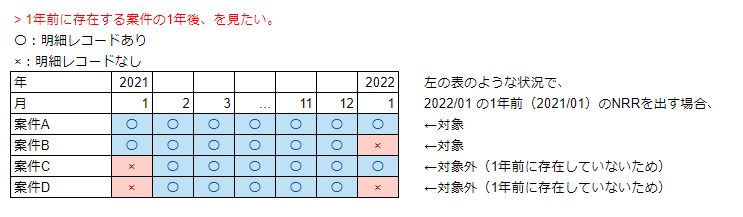

### スプレッドシートのデータを取得、型変換

In [ ]:
# スプレッドシートを開く（IDから）
key = '15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw'
ss = gc.open_by_key(key)

# シートを取得
sheet = ss.get_worksheet(1)
print(sheet)

<Worksheet 'CSV処理後_案件毎' id:0>


In [ ]:
# シートからデータを読み込み・DataFrame へ変換
dic = sheet.get_all_records()
ss_df = pl.from_dicts(dic)

# 読み込んだ DataFrame の日付と金額の各列のデータ型を変換
# 空文字列 "" を変換しようとするとエラーになるので strict=False でエラーを無視（null に置換）させる
ss_df = ss_df.with_columns(
  pl.col('対象年月').str.strptime(pl.Date, '%Y-%m-%d', strict=False),
  pl.col('開始日').str.strptime(pl.Date, '%Y-%m-%d', strict=False),
  pl.col('終了日').str.strptime(pl.Date, '%Y-%m-%d', strict=False),
  pl.col('^請求額_.+$').cast(pl.Float64, strict=False),
  # pl.col('^移動平均_.+$').cast(pl.Float64, strict=False),
)

ss_df.head()

対象年月,計上部署,部署グループ,取引先ID,案件ID,開始日,終了日,取引先名,案件名,請求額_当月,請求額_01ヶ月前,請求額_02ヶ月前,請求額_03ヶ月前,請求額_04ヶ月前,請求額_05ヶ月前,請求額_06ヶ月前,請求額_07ヶ月前,請求額_08ヶ月前,請求額_09ヶ月前,請求額_10ヶ月前,請求額_11ヶ月前,請求額_12ヶ月前,請求額_01ヶ月後,請求額_02ヶ月後,請求額_03ヶ月後,請求額_04ヶ月後,請求額_05ヶ月後,請求額_06ヶ月後,請求額_07ヶ月後,請求額_08ヶ月後,請求額_09ヶ月後,請求額_10ヶ月後,請求額_11ヶ月後,請求額_12ヶ月後
date,str,str,str,str,date,date,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",null,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",28000.0,null,null,null,null,null,null,null,null,null,null,null,null,30270.0,67586.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",30000.0,null,null,null,null,null,null,null,null,null,null,null,null,30000.0,30000.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",0.0,null,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-07-01,null,"""株式会社クリーク・アンド・リ…","""アトラクションフェスタ""",42000.0,null,null,null,null,null,null,null,null,null,null,null,null,39730.0,2414.0,38000.0,38000.0,38000.0,38000.0,38000.0,38000.0,65000.0,38000.0,38000.0,38000.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン""",307500.0,null,null,null,null,null,null,null,null,null,null,null,null,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0


### 読み込んだデータからSGを除外

In [ ]:
ss_df = ss_df.filter(
  pl.col('部署グループ') != 'SG'
)

ss_df.head()

対象年月,計上部署,部署グループ,取引先ID,案件ID,開始日,終了日,取引先名,案件名,請求額_当月,請求額_01ヶ月前,請求額_02ヶ月前,請求額_03ヶ月前,請求額_04ヶ月前,請求額_05ヶ月前,請求額_06ヶ月前,請求額_07ヶ月前,請求額_08ヶ月前,請求額_09ヶ月前,請求額_10ヶ月前,請求額_11ヶ月前,請求額_12ヶ月前,請求額_01ヶ月後,請求額_02ヶ月後,請求額_03ヶ月後,請求額_04ヶ月後,請求額_05ヶ月後,請求額_06ヶ月後,請求額_07ヶ月後,請求額_08ヶ月後,請求額_09ヶ月後,請求額_10ヶ月後,請求額_11ヶ月後,請求額_12ヶ月後
date,str,str,str,str,date,date,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",null,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",28000.0,null,null,null,null,null,null,null,null,null,null,null,null,30270.0,67586.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",30000.0,null,null,null,null,null,null,null,null,null,null,null,null,30000.0,30000.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-01-01,2021-03-18,"""株式会社クリーク・アンド・リ…","""キン肉マン 超人タッグファイ…",0.0,null,null,null,null,null,null,null,null,null,null,null,null,0.0,0.0,null,null,null,null,null,null,null,null,null,null
2021-01-01,"""CRSD""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2017-07-01,null,"""株式会社クリーク・アンド・リ…","""アトラクションフェスタ""",42000.0,null,null,null,null,null,null,null,null,null,null,null,null,39730.0,2414.0,38000.0,38000.0,38000.0,38000.0,38000.0,38000.0,65000.0,38000.0,38000.0,38000.0
2021-01-01,"""CSJP""","""CS""","""C-00001489""","""OMD-SAS-Servic…",2020-09-15,2022-12-31,"""株式会社クリーク・アンド・リ…","""トレすごタウン""",307500.0,null,null,null,null,null,null,null,null,null,null,null,null,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0,307500.0


### 以降の処理用の関数定義

In [ ]:
from datetime import date
from dateutil.relativedelta import relativedelta

# 各レコードに移動平均の列を追加するための関数
def addNthMonthMovingAverage_client(row, i, m, col_names, col_types, first_date, cols_period, offset_month=0):
  # apply で渡されてきた行のデータを DataFrame に変換 / 型情報を渡さないとエラーになる場合があるので schema_overrides を使用
  val = pl.DataFrame([row], schema=col_names, schema_overrides=col_types)

  # 対象月と案件の開始日 (開始日が null の場合はダミーの値を設定)
  target_month = val[0]['対象年月'][0] + relativedelta(months=i) + relativedelta(months=offset_month)
  start = val[0][f'[{i:02}]開始日_最古'][0] if val[0][f'[{i:02}]開始日_最古'][0] != None else date(2000, 1, 1)

  # 対象月 - (m - 1) が 案件の開始日 - 1ヶ月 以前になる場合は null を返す
  if (target_month - relativedelta(months=m - 1)) <= (start - relativedelta(months=1)):
    return None
  # 対象月 - (m - 1) が CSV の最古の対象月よりも前になる場合は null を返す
  elif (target_month - relativedelta(months=m - 1)) < first_date:
    return None
  # 対象月から mヶ月前 までの平均を返す（sum の結果がゼロの場合は平均ではなくゼロを返す）
  else:
    sum_result = val.select(pl.col(cols_period)).sum(axis=1)[0]
    return sum_result / m if sum_result > 0 else 0

### 取引先ごとに再集計

#### 取引先ごとにグループ化して再処理

In [ ]:
# 3, 6, 12ヶ月の過去売り上げごと・取引先ごとにグルーピング
from tqdm import tqdm
from datetime import date
from dateutil.relativedelta import relativedelta

target_months = [3, 6, 12]
result_dfs_client = []
column_rename_dic = dict(
  [(f'請求額_{i:02}ヶ月前', f'請求額_{-i}') for i in range(1, 13)] +
  [('請求額_当月', '請求額_0')] +
  [(f'請求額_{i:02}ヶ月後', f'請求額_{i}') for i in range(1, 13)]
)

# 開始・終了日、取引先名の apply 処理用関数
def getLatestDate_client(row, df):
  val = df.filter((pl.col('取引先ID') == row[1]))
  start = val.sort('開始日')['開始日'][0]
  end = val.sort('終了日', descending=True)['終了日'][0] if not None in set(val['終了日']) else None
  client = val.sort('開始日')['取引先名'][0]
  return (start, end, client)

for i in target_months:
  print(f'===== target_months = {i:02} =======================')

  # 対象月が (レコードの最新の対象月 - iヶ月) より後になるレコードを除外
  temp_nth_months_df = ss_df.filter(
    pl.col('対象年月') <= (ss_df['対象年月'][-1] - relativedelta(months=i))
  ).sort(
    '対象年月', '取引先ID'
  )

  # 対象年月、取引先ID でグループ化
  # groupby().sum() で date 型も計算されてしまうため「開始日、終了日」の列は除外
  temp_grouping_df = temp_nth_months_df.select(
    pl.col('*').exclude('開始日', '終了日')
  ).groupby(
    '対象年月', '取引先ID'
  ).sum().with_columns(
    pl.col(f'請求額_{i:02}ヶ月後').alias(f'[{i:02}]請求額_当月'), # iヶ月後の請求額を当月分として列を作成
    pl.col(f'請求額_当月').alias(f'[{i:02}]請求額_{i:02}ヶ月前')  # 当月の請求額をiヶ月前分として列を作成
  )

  # 請求額のカラム名を「当月をゼロとした連番」にリネーム（12ヶ月前：請求額_-12 ～ 当月：請求額_0 ～ 12ヶ月後：請求額_12）
  temp_grouping_df = temp_grouping_df.rename(column_rename_dic)

  # 同一取引先IDのレコードから 最も古い開始日, 最も新しい終了日, 最も新しい取引先名 を追加
  # 開始日・終了日はそれぞれ null が含まれる場合は null にする
  # 開始日・終了日のすべての値が null だった場合、カラムのデータ型も null になってしまうので cast で型を指定する
  new_cols_client = temp_grouping_df.apply(lambda row: getLatestDate_client(row, temp_nth_months_df))
  new_cols_client = new_cols_client.with_columns(
    pl.col('column_0').cast(pl.Date, strict=False),
    pl.col('column_1').cast(pl.Date, strict=False),
  )
  temp_grouping_df = temp_grouping_df.with_columns(
    new_cols_client['column_0'].alias(f'[{i:02}]開始日_最古'),
    new_cols_client['column_1'].alias(f'[{i:02}]終了日_最新'),
    new_cols_client['column_2'].alias('取引先名')
  )

  print(f' - {i:02}ヶ月継続案件のみ | (当月 + {i:02}ヶ月) を起点とした移動平均      : ', end='')
  # (当月 + iヶ月)から過去3, 6, 12ヶ月間の移動平均を追加
  for m in tqdm(target_months):
    # apply で処理する際のカラム名、型情報、最古の日付
    col_names = temp_grouping_df.columns
    col_types = dict(zip(col_names, temp_grouping_df.dtypes))
    first_date = ss_df['対象年月'][0]

    # (当月 + iヶ月) から (i - mヶ月前) までのカラム名のリストを生成
    cols_period = [f'請求額_{n}' for n in range(i, i - m, -1)]

    new_col = temp_grouping_df.apply(lambda row: addNthMonthMovingAverage_client(row, i, m, col_names, col_types, first_date, cols_period), return_dtype=pl.Float64)
    temp_grouping_df = temp_grouping_df.with_columns(new_col['apply'].alias(f'[{i:02}]移動平均_当月-{m:02}ヶ月間'))

  print(f' - {i:02}ヶ月継続案件のみ | (当月 + {i:02}ヶ月) の n ヶ月前からの移動平均 : ', end='')
  # iヶ月前から過去3, 6, 12ヶ月間の移動平均を追加
  for m in tqdm(target_months):
    # apply で処理する際のカラム名、型情報、最古の日付
    col_names = temp_grouping_df.columns
    col_types = dict(zip(col_names, temp_grouping_df.dtypes))
    first_date = ss_df['対象年月'][0]

    # (当月) から (当月 - mヶ月前) までのカラム名のリストを生成
    cols_period = [f'請求額_{n}' for n in range(0, -m, -1)]
    new_col = temp_grouping_df.apply(lambda row: addNthMonthMovingAverage_client(row, i, m, col_names, col_types, first_date, cols_period, offset_month=-i), return_dtype=pl.Float64)
    temp_grouping_df = temp_grouping_df.with_columns(new_col['apply'].alias(f'[{i:02}]移動平均_{i:02}ヶ月前-{m:02}ヶ月間'))

  # 対象年月を iヶ月後に更新
  temp_grouping_df = temp_grouping_df.with_columns(temp_grouping_df['対象年月'].apply(lambda x: x + relativedelta(months=i)))

  # 残す列を選択
  # 対象年月 ～ 請求額_nヶ月前 まで
  temp_result_months_df = temp_grouping_df.select(
      pl.col(
        '対象年月',
        '取引先ID',
        '取引先名',
        f'[{i:02}]開始日_最古',
        f'[{i:02}]終了日_最新',
        f'[{i:02}]請求額_当月',
        f'[{i:02}]請求額_{i:02}ヶ月前',
      )
    )
  # 移動平均_nヶ月 のみ（pl.col でのカラム選択に正規表現を混在させられないようなのでこれのみ分割）
  temp_result_average_df = temp_grouping_df.select(
      pl.col(
        f'^\[{i:02}\]移動平均_.+$',
      )
    )
  # 対象年月 ～ 請求額_nヶ月前 と 移動平均_nヶ月 を結合
  temp_grouping_df = pl.concat([temp_result_months_df, temp_result_average_df], how='horizontal')

  # 処理した df を result_dfs_client に append
  result_dfs_client.append(temp_grouping_df)

===== target_months = 03 =======================
 - 03ヶ月継続案件のみ | (当月 + 03ヶ月) を起点とした移動平均      : 

100%|██████████| 3/3 [00:13<00:00,  4.34s/it]


 - 03ヶ月継続案件のみ | (当月 + 03ヶ月) の n ヶ月前からの移動平均 : 

100%|██████████| 3/3 [00:12<00:00,  4.23s/it]


===== target_months = 06 =======================
 - 06ヶ月継続案件のみ | (当月 + 06ヶ月) を起点とした移動平均      : 

100%|██████████| 3/3 [00:11<00:00,  3.73s/it]


 - 06ヶ月継続案件のみ | (当月 + 06ヶ月) の n ヶ月前からの移動平均 : 

100%|██████████| 3/3 [00:11<00:00,  3.71s/it]


===== target_months = 12 =======================
 - 12ヶ月継続案件のみ | (当月 + 12ヶ月) を起点とした移動平均      : 

100%|██████████| 3/3 [00:08<00:00,  2.85s/it]


 - 12ヶ月継続案件のみ | (当月 + 12ヶ月) の n ヶ月前からの移動平均 : 

100%|██████████| 3/3 [00:08<00:00,  2.91s/it]


In [ ]:
# result_dfs_client (3, 6, 12ヶ月ごとの処理結果) を結合
result_df_by_client = result_dfs_client[0]
for i in range(1, len(result_dfs_client)):
  result_df_by_client = result_df_by_client.join(result_dfs_client[i], on=['対象年月', '取引先ID', '取引先名'], how='left')
result_df_by_client = result_df_by_client.sort('対象年月', '取引先ID')

result_df_by_client

対象年月,取引先ID,取引先名,[03]開始日_最古,[03]終了日_最新,[03]請求額_当月,[03]請求額_03ヶ月前,[03]移動平均_当月-03ヶ月間,[03]移動平均_当月-06ヶ月間,[03]移動平均_当月-12ヶ月間,[03]移動平均_03ヶ月前-03ヶ月間,[03]移動平均_03ヶ月前-06ヶ月間,[03]移動平均_03ヶ月前-12ヶ月間,[06]開始日_最古,[06]終了日_最新,[06]請求額_当月,[06]請求額_06ヶ月前,[06]移動平均_当月-03ヶ月間,[06]移動平均_当月-06ヶ月間,[06]移動平均_当月-12ヶ月間,[06]移動平均_06ヶ月前-03ヶ月間,[06]移動平均_06ヶ月前-06ヶ月間,[06]移動平均_06ヶ月前-12ヶ月間,[12]開始日_最古,[12]終了日_最新,[12]請求額_当月,[12]請求額_12ヶ月前,[12]移動平均_当月-03ヶ月間,[12]移動平均_当月-06ヶ月間,[12]移動平均_当月-12ヶ月間,[12]移動平均_12ヶ月前-03ヶ月間,[12]移動平均_12ヶ月前-06ヶ月間,[12]移動平均_12ヶ月前-12ヶ月間
date,str,str,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64
2021-04-01,"""C-00001489""","""株式会社クリーク・アンド・リ…",null,null,385500.0,447500.0,426833.333333,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001491""","""株式会社サイバーエージェント…",2013-08-01,null,190000.0,120000.0,190000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001506""","""株式会社イード""",2010-09-22,2023-03-31,50000.0,50000.0,50000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001526""","""コムシード株式会社""",2016-10-01,2021-05-05,45000.0,45000.0,45000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001596""","""株式会社グローバルウェイ""",2018-04-09,2021-01-31,null,385000.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001601""","""株式会社モバイルファクトリー…",null,null,485060.0,584000.0,528706.666667,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001655""","""株式会社インターエデュ・ドッ…",2010-01-18,null,155000.0,150000.0,141666.666667,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001669""","""株式会社エス・エム・エス""",2013-01-01,null,60000.0,70000.0,60000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001702""","""株式会社ヴァル研究所""",2018-08-20,null,74000.0,74000.0,74000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [ ]:
# nヶ月ごとでグルーピングする前の、取引先毎の該当月全体の合計請求額を取得
client_total = ss_df.filter(
    pl.col('対象年月') >= (ss_df['対象年月'][0] + relativedelta(months=min(target_months)))
  ).groupby(
    '対象年月', '取引先ID'
  ).sum().with_columns(
    pl.col(f'請求額_当月').alias('請求額')
  ).select(
    pl.col('対象年月', '取引先ID', '請求額')
  ).sort('対象年月', '取引先ID')

def getClientTotal(row):
  total_price = client_total.filter(
    (pl.col('対象年月') == row[0]) & (pl.col('取引先ID') == row[1])
  )['請求額']
  if len(total_price) > 0:
    return total_price[0]
  else:
    return None

new_col_by_client_total = result_df_by_client.apply(getClientTotal)
new_col_by_client_total = new_col_by_client_total.select(pl.col('apply').cast(pl.Float64, strict=False).alias('請求額'))
result_df_by_client.insert_at_idx(3, new_col_by_client_total['請求額'])

対象年月,取引先ID,取引先名,請求額,[03]開始日_最古,[03]終了日_最新,[03]請求額_当月,[03]請求額_03ヶ月前,[03]移動平均_当月-03ヶ月間,[03]移動平均_当月-06ヶ月間,[03]移動平均_当月-12ヶ月間,[03]移動平均_03ヶ月前-03ヶ月間,[03]移動平均_03ヶ月前-06ヶ月間,[03]移動平均_03ヶ月前-12ヶ月間,[06]開始日_最古,[06]終了日_最新,[06]請求額_当月,[06]請求額_06ヶ月前,[06]移動平均_当月-03ヶ月間,[06]移動平均_当月-06ヶ月間,[06]移動平均_当月-12ヶ月間,[06]移動平均_06ヶ月前-03ヶ月間,[06]移動平均_06ヶ月前-06ヶ月間,[06]移動平均_06ヶ月前-12ヶ月間,[12]開始日_最古,[12]終了日_最新,[12]請求額_当月,[12]請求額_12ヶ月前,[12]移動平均_当月-03ヶ月間,[12]移動平均_当月-06ヶ月間,[12]移動平均_当月-12ヶ月間,[12]移動平均_12ヶ月前-03ヶ月間,[12]移動平均_12ヶ月前-06ヶ月間,[12]移動平均_12ヶ月前-12ヶ月間
date,str,str,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64
2021-04-01,"""C-00001489""","""株式会社クリーク・アンド・リ…",385500.0,null,null,385500.0,447500.0,426833.333333,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001491""","""株式会社サイバーエージェント…",190000.0,2013-08-01,null,190000.0,120000.0,190000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001506""","""株式会社イード""",50000.0,2010-09-22,2023-03-31,50000.0,50000.0,50000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001526""","""コムシード株式会社""",45000.0,2016-10-01,2021-05-05,45000.0,45000.0,45000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001596""","""株式会社グローバルウェイ""",null,2018-04-09,2021-01-31,null,385000.0,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001601""","""株式会社モバイルファクトリー…",485060.0,null,null,485060.0,584000.0,528706.666667,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001655""","""株式会社インターエデュ・ドッ…",155000.0,2010-01-18,null,155000.0,150000.0,141666.666667,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001669""","""株式会社エス・エム・エス""",60000.0,2013-01-01,null,60000.0,70000.0,60000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""C-00001702""","""株式会社ヴァル研究所""",74000.0,2018-08-20,null,74000.0,74000.0,74000.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


#### 処理結果をスプレッドシートの3番目のシートへ展開

In [ ]:
# スプレッドシートを開く（IDから）
key = '15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw'
ss = gc.open_by_key(key)

# シートを取得
sheet_client = ss.get_worksheet(2)
print(sheet_client)

<Worksheet '取引先毎' id:739240386>


In [ ]:
# 対象年月 を date から str へ変換
result_df_by_client = result_df_by_client.with_columns(
  pl.col('対象年月').dt.strftime('%Y-%m-%d'),
  pl.col('^.*開始日_.+$').dt.strftime('%Y-%m-%d'),
  pl.col('^.*終了日_.+$').dt.strftime('%Y-%m-%d'),
)
result_df_by_client.head()

# CSV処理後の Dataframe を二次元リストに変換
result_list_by_client = []
for col in result_df_by_client.columns:
  temp_list = [col]
  temp_list += result_df_by_client[col].to_list()
  result_list_by_client.append(temp_list)

# リストを転置
result_list_by_client = [list(x) for x in zip(*result_list_by_client)]
result_list_by_client[0:2]

[['対象年月',
  '取引先ID',
  '取引先名',
  '請求額',
  '[03]開始日_最古',
  '[03]終了日_最新',
  '[03]請求額_当月',
  '[03]請求額_03ヶ月前',
  '[03]移動平均_当月-03ヶ月間',
  '[03]移動平均_当月-06ヶ月間',
  '[03]移動平均_当月-12ヶ月間',
  '[03]移動平均_03ヶ月前-03ヶ月間',
  '[03]移動平均_03ヶ月前-06ヶ月間',
  '[03]移動平均_03ヶ月前-12ヶ月間',
  '[06]開始日_最古',
  '[06]終了日_最新',
  '[06]請求額_当月',
  '[06]請求額_06ヶ月前',
  '[06]移動平均_当月-03ヶ月間',
  '[06]移動平均_当月-06ヶ月間',
  '[06]移動平均_当月-12ヶ月間',
  '[06]移動平均_06ヶ月前-03ヶ月間',
  '[06]移動平均_06ヶ月前-06ヶ月間',
  '[06]移動平均_06ヶ月前-12ヶ月間',
  '[12]開始日_最古',
  '[12]終了日_最新',
  '[12]請求額_当月',
  '[12]請求額_12ヶ月前',
  '[12]移動平均_当月-03ヶ月間',
  '[12]移動平均_当月-06ヶ月間',
  '[12]移動平均_当月-12ヶ月間',
  '[12]移動平均_12ヶ月前-03ヶ月間',
  '[12]移動平均_12ヶ月前-06ヶ月間',
  '[12]移動平均_12ヶ月前-12ヶ月間'],
 ['2021-04-01',
  'C-00001489',
  '株式会社クリーク・アンド・リバー社',
  385500.0,
  None,
  None,
  385500.0,
  447500.0,
  426833.3333333333,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  Non

In [ ]:
# シートを一旦クリア
sheet_client.clear()

# 2次元配列を一括で書き込み
sheet_client.update(result_list_by_client)

{'spreadsheetId': '15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw',
 'updatedRange': "'取引先毎'!A1:AH6794",
 'updatedRows': 6794,
 'updatedColumns': 34,
 'updatedCells': 157052}

### 部署グループごとに再集計

#### 部署グループごとにグループ化して再処理

In [ ]:
# 3, 6, 12ヶ月の過去売り上げごと・部署グループごとにグルーピング
from tqdm import tqdm
from datetime import date
from dateutil.relativedelta import relativedelta

target_months = [3, 6, 12]
result_dfs_division = []
column_rename_dic = dict(
  [(f'請求額_{i:02}ヶ月前', f'請求額_{-i}') for i in range(1, 13)] +
  [('請求額_当月', '請求額_0')] +
  [(f'請求額_{i:02}ヶ月後', f'請求額_{i}') for i in range(1, 13)]
)

# 開始・終了日の apply 処理用関数
def getLatestDate_division(row, df):
  val = df.filter((pl.col('部署グループ') == row[1]))
  start = val.sort('開始日')['開始日'][0]
  end = val.sort('終了日', descending=True)['終了日'][0] if not None in set(val['終了日']) else None
  return (start, end)

for i in target_months:
  print(f'===== target_months = {i:02} =======================')

  # 対象月が (レコードの最新の対象月 - iヶ月) より後になるレコードを除外
  temp_nth_months_df = ss_df.filter(
    pl.col('対象年月') <= (ss_df['対象年月'][-1] - relativedelta(months=i))
  ).sort(
    '対象年月', '部署グループ'
  )

  # 対象年月、部署グループ でグループ化
  # groupby().sum() で date 型も計算されてしまうため「開始日、終了日」の列は除外
  temp_grouping_df = temp_nth_months_df.select(
    pl.col('*').exclude('開始日', '終了日')
  ).groupby(
    '対象年月', '部署グループ'
  ).sum().with_columns(
    pl.col(f'請求額_{i:02}ヶ月後').alias(f'[{i:02}]請求額_当月'), # iヶ月後の請求額を当月分として列を作成
    pl.col(f'請求額_当月').alias(f'[{i:02}]請求額_{i:02}ヶ月前')  # 当月の請求額をiヶ月前分として列を作成
  )

  # 請求額のカラム名を「当月をゼロとした連番」にリネーム（12ヶ月前：請求額_-12 ～ 当月：請求額_0 ～ 12ヶ月後：請求額_12）
  temp_grouping_df = temp_grouping_df.rename(column_rename_dic)

  # 同一部署グループのレコードから 最も古い開始日, 最も新しい終了日 を追加（それぞれ null が含まれる場合は null にする）
  # すべての値が null だった場合、カラムのデータ型が null になってしまうので cast で型を指定する
  new_cols_division = temp_grouping_df.apply(lambda row: getLatestDate_division(row, temp_nth_months_df))
  new_cols_division = new_cols_division.with_columns(
    pl.col('column_0').cast(pl.Date, strict=False),
    pl.col('column_1').cast(pl.Date, strict=False),
  )
  temp_grouping_df = temp_grouping_df.with_columns(
    new_cols_division['column_0'].alias(f'[{i:02}]開始日_最古'),
    new_cols_division['column_1'].alias(f'[{i:02}]終了日_最新')
  )

  print(f' - {i:02}ヶ月継続案件のみ | (当月 + {i:02}ヶ月) を起点とした移動平均      : ', end='')
  # (当月 + iヶ月)から過去3, 6, 12ヶ月間の移動平均を追加
  for m in tqdm(target_months):
    # apply で処理する際のカラム名、型情報、最古の日付
    col_names = temp_grouping_df.columns
    col_types = dict(zip(col_names, temp_grouping_df.dtypes))
    first_date = ss_df['対象年月'][0]

    # (当月 + iヶ月) から (i - mヶ月前) までのカラム名のリストを生成
    cols_period = [f'請求額_{n}' for n in range(i, i - m, -1)]

    new_col = temp_grouping_df.apply(lambda row: addNthMonthMovingAverage_client(row, i, m, col_names, col_types, first_date, cols_period), return_dtype=pl.Float64)
    temp_grouping_df = temp_grouping_df.with_columns(new_col['apply'].alias(f'[{i:02}]移動平均_当月-{m:02}ヶ月間'))

  print(f' - {i:02}ヶ月継続案件のみ | (当月 + {i:02}ヶ月) の n ヶ月前からの移動平均 : ', end='')
  # iヶ月前から過去3, 6, 12ヶ月間の移動平均を追加
  for m in tqdm(target_months):
    # apply で処理する際のカラム名、型情報、最古の日付
    col_names = temp_grouping_df.columns
    col_types = dict(zip(col_names, temp_grouping_df.dtypes))
    first_date = ss_df['対象年月'][0]

    # (当月) から (当月 - mヶ月前) までのカラム名のリストを生成
    cols_period = [f'請求額_{n}' for n in range(0, -m, -1)]
    new_col = temp_grouping_df.apply(lambda row: addNthMonthMovingAverage_client(row, i, m, col_names, col_types, first_date, cols_period, offset_month=-i), return_dtype=pl.Float64)
    temp_grouping_df = temp_grouping_df.with_columns(new_col['apply'].alias(f'[{i:02}]移動平均_{i:02}ヶ月前-{m:02}ヶ月間'))

  # 対象年月を iヶ月後に更新
  temp_grouping_df = temp_grouping_df.with_columns(temp_grouping_df['対象年月'].apply(lambda x: x + relativedelta(months=i)))

  # 残す列を選択
  # 対象年月 ～ 請求額_nヶ月前 まで
  temp_result_months_df = temp_grouping_df.select(
      pl.col(
        '対象年月',
        '部署グループ',
        f'[{i:02}]開始日_最古',
        f'[{i:02}]終了日_最新',
        f'[{i:02}]請求額_当月',
        f'[{i:02}]請求額_{i:02}ヶ月前',
      )
    )
  # 移動平均_nヶ月 のみ（pl.col でのカラム選択に正規表現を混在させられないようなのでこれのみ分割）
  temp_result_average_df = temp_grouping_df.select(
      pl.col(
        f'^\[{i:02}\]移動平均_.+$',
      )
    )
  # 対象年月 ～ 請求額_nヶ月前 と 移動平均_nヶ月 を結合
  temp_grouping_df = pl.concat([temp_result_months_df, temp_result_average_df], how='horizontal')

  # 処理した df を result_dfs_division に append
  result_dfs_division.append(temp_grouping_df)

===== target_months = 03 =======================
 - 03ヶ月継続案件のみ | (当月 + 03ヶ月) を起点とした移動平均      : 

100%|██████████| 3/3 [00:00<00:00, 13.36it/s]


 - 03ヶ月継続案件のみ | (当月 + 03ヶ月) の n ヶ月前からの移動平均 : 

100%|██████████| 3/3 [00:00<00:00, 13.98it/s]


===== target_months = 06 =======================
 - 06ヶ月継続案件のみ | (当月 + 06ヶ月) を起点とした移動平均      : 

100%|██████████| 3/3 [00:00<00:00, 15.16it/s]


 - 06ヶ月継続案件のみ | (当月 + 06ヶ月) の n ヶ月前からの移動平均 : 

100%|██████████| 3/3 [00:00<00:00, 15.96it/s]


===== target_months = 12 =======================
 - 12ヶ月継続案件のみ | (当月 + 12ヶ月) を起点とした移動平均      : 

100%|██████████| 3/3 [00:00<00:00, 18.94it/s]


 - 12ヶ月継続案件のみ | (当月 + 12ヶ月) の n ヶ月前からの移動平均 : 

100%|██████████| 3/3 [00:00<00:00, 20.27it/s]


In [ ]:
# result_dfs_division (3, 6, 12ヶ月ごとの処理結果) を結合
result_df_by_division = result_dfs_division[0]
for i in range(1, len(result_dfs_division)):
  result_df_by_division = result_df_by_division.join(result_dfs_division[i], on=['対象年月', '部署グループ'], how='left')
result_df_by_division = result_df_by_division.sort('対象年月', '部署グループ')

result_df_by_division

対象年月,部署グループ,[03]開始日_最古,[03]終了日_最新,[03]請求額_当月,[03]請求額_03ヶ月前,[03]移動平均_当月-03ヶ月間,[03]移動平均_当月-06ヶ月間,[03]移動平均_当月-12ヶ月間,[03]移動平均_03ヶ月前-03ヶ月間,[03]移動平均_03ヶ月前-06ヶ月間,[03]移動平均_03ヶ月前-12ヶ月間,[06]開始日_最古,[06]終了日_最新,[06]請求額_当月,[06]請求額_06ヶ月前,[06]移動平均_当月-03ヶ月間,[06]移動平均_当月-06ヶ月間,[06]移動平均_当月-12ヶ月間,[06]移動平均_06ヶ月前-03ヶ月間,[06]移動平均_06ヶ月前-06ヶ月間,[06]移動平均_06ヶ月前-12ヶ月間,[12]開始日_最古,[12]終了日_最新,[12]請求額_当月,[12]請求額_12ヶ月前,[12]移動平均_当月-03ヶ月間,[12]移動平均_当月-06ヶ月間,[12]移動平均_当月-12ヶ月間,[12]移動平均_12ヶ月前-03ヶ月間,[12]移動平均_12ヶ月前-06ヶ月間,[12]移動平均_12ヶ月前-12ヶ月間
date,str,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64
2021-04-01,"""CS""",null,null,1.24675113e8,1.3148179e8,1.2855e8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""HT""",2017-04-01,null,837100.0,902100.0,880433.333333,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""MONI""",2008-06-02,null,3.7438775e7,3.6880118e7,3.6644e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""SPY""",2012-03-01,null,1.459605e7,1.599655e7,1.5361e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""CS""",null,null,1.27150429e8,1.30423186e8,1.3099e8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""HT""",2017-04-01,null,837100.0,902100.0,858766.666667,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""MONI""",2008-06-02,null,3.63519e7,3.6606636e7,3.7121e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""SPY""",2012-03-01,null,1.419145e7,1.6063475e7,1.48794e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-06-01,"""CS""",null,null,1.33193476e8,1.43711713e8,1.2998e8,1.3183e8,null,1.33682863e8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


In [ ]:
# nヶ月ごとでグルーピングする前の、部署グループ毎の該当月全体の合計請求額を取得
division_total = ss_df.filter(
    pl.col('対象年月') >= (ss_df['対象年月'][0] + relativedelta(months=min(target_months)))
  ).groupby(
    '対象年月', '部署グループ'
  ).sum().with_columns(
    pl.col(f'請求額_当月').alias('請求額')
  ).select(
    pl.col('対象年月', '部署グループ', '請求額')
  ).sort('対象年月', '部署グループ')

def getDivisionTotal(row):
  total_price = division_total.filter(
    (pl.col('対象年月') == row[0]) & (pl.col('部署グループ') == row[1])
  )['請求額']
  if len(total_price) > 0:
    return total_price[0]
  else:
    return None

new_col_by_division_total = result_df_by_division.apply(getDivisionTotal)
new_col_by_division_total = new_col_by_division_total.select(pl.col('apply').cast(pl.Float64, strict=False).alias('請求額'))
result_df_by_division.insert_at_idx(2, new_col_by_division_total['請求額'])

対象年月,部署グループ,請求額,[03]開始日_最古,[03]終了日_最新,[03]請求額_当月,[03]請求額_03ヶ月前,[03]移動平均_当月-03ヶ月間,[03]移動平均_当月-06ヶ月間,[03]移動平均_当月-12ヶ月間,[03]移動平均_03ヶ月前-03ヶ月間,[03]移動平均_03ヶ月前-06ヶ月間,[03]移動平均_03ヶ月前-12ヶ月間,[06]開始日_最古,[06]終了日_最新,[06]請求額_当月,[06]請求額_06ヶ月前,[06]移動平均_当月-03ヶ月間,[06]移動平均_当月-06ヶ月間,[06]移動平均_当月-12ヶ月間,[06]移動平均_06ヶ月前-03ヶ月間,[06]移動平均_06ヶ月前-06ヶ月間,[06]移動平均_06ヶ月前-12ヶ月間,[12]開始日_最古,[12]終了日_最新,[12]請求額_当月,[12]請求額_12ヶ月前,[12]移動平均_当月-03ヶ月間,[12]移動平均_当月-06ヶ月間,[12]移動平均_当月-12ヶ月間,[12]移動平均_12ヶ月前-03ヶ月間,[12]移動平均_12ヶ月前-06ヶ月間,[12]移動平均_12ヶ月前-12ヶ月間
date,str,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64,date,date,f64,f64,f64,f64,f64,f64,f64,f64
2021-04-01,"""CS""",1.35278372e8,null,null,1.24675113e8,1.3148179e8,1.2855e8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""HT""",837100.0,2017-04-01,null,837100.0,902100.0,880433.333333,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""MONI""",3.8628525e7,2008-06-02,null,3.7438775e7,3.6880118e7,3.6644e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-04-01,"""SPY""",1.7489217e7,2012-03-01,null,1.459605e7,1.599655e7,1.5361e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""CS""",1.37443702e8,null,null,1.27150429e8,1.30423186e8,1.3099e8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""HT""",1.233552e6,2017-04-01,null,837100.0,902100.0,858766.666667,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""MONI""",3.7113057e7,2008-06-02,null,3.63519e7,3.6606636e7,3.7121e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-05-01,"""SPY""",1.6892714e7,2012-03-01,null,1.419145e7,1.6063475e7,1.48794e7,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2021-06-01,"""CS""",1.46140522e8,null,null,1.33193476e8,1.43711713e8,1.2998e8,1.3183e8,null,1.33682863e8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


#### 処理結果をスプレッドシートの4番目のシートへ展開

In [ ]:
# スプレッドシートを開く（IDから）
key = '15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw'
ss = gc.open_by_key(key)

# シートを取得
sheet_client = ss.get_worksheet(3)
print(sheet_client)

<Worksheet '部署グループ毎' id:1350725156>


In [ ]:
# 対象年月 を date から str へ変換
result_df_by_division = result_df_by_division.with_columns(
  pl.col('対象年月').dt.strftime('%Y-%m-%d'),
  pl.col('^.*開始日_.+$').dt.strftime('%Y-%m-%d'),
  pl.col('^.*終了日_.+$').dt.strftime('%Y-%m-%d'),
)
result_df_by_division.head()

# CSV処理後の Dataframe を二次元リストに変換
result_list_by_division = []
for col in result_df_by_division.columns:
  temp_list = [col]
  temp_list += result_df_by_division[col].to_list()
  result_list_by_division.append(temp_list)

# リストを転置
result_list_by_division = [list(x) for x in zip(*result_list_by_division)]
result_list_by_division[0:2]

[['対象年月',
  '部署グループ',
  '請求額',
  '[03]開始日_最古',
  '[03]終了日_最新',
  '[03]請求額_当月',
  '[03]請求額_03ヶ月前',
  '[03]移動平均_当月-03ヶ月間',
  '[03]移動平均_当月-06ヶ月間',
  '[03]移動平均_当月-12ヶ月間',
  '[03]移動平均_03ヶ月前-03ヶ月間',
  '[03]移動平均_03ヶ月前-06ヶ月間',
  '[03]移動平均_03ヶ月前-12ヶ月間',
  '[06]開始日_最古',
  '[06]終了日_最新',
  '[06]請求額_当月',
  '[06]請求額_06ヶ月前',
  '[06]移動平均_当月-03ヶ月間',
  '[06]移動平均_当月-06ヶ月間',
  '[06]移動平均_当月-12ヶ月間',
  '[06]移動平均_06ヶ月前-03ヶ月間',
  '[06]移動平均_06ヶ月前-06ヶ月間',
  '[06]移動平均_06ヶ月前-12ヶ月間',
  '[12]開始日_最古',
  '[12]終了日_最新',
  '[12]請求額_当月',
  '[12]請求額_12ヶ月前',
  '[12]移動平均_当月-03ヶ月間',
  '[12]移動平均_当月-06ヶ月間',
  '[12]移動平均_当月-12ヶ月間',
  '[12]移動平均_12ヶ月前-03ヶ月間',
  '[12]移動平均_12ヶ月前-06ヶ月間',
  '[12]移動平均_12ヶ月前-12ヶ月間'],
 ['2021-04-01',
  'CS',
  135278372.0,
  None,
  None,
  124675113.0,
  131481790.0,
  128545394.33333333,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None]]

In [ ]:
# シートを一旦クリア
sheet_client.clear()

# 2次元配列を一括で書き込み
sheet_client.update(result_list_by_division)

{'spreadsheetId': '15gxCoKnyMQZNqlODgbIeR2H1BfJ7KahfL61rckIEwkw',
 'updatedRange': "'部署グループ毎'!A1:AG117",
 'updatedRows': 117,
 'updatedColumns': 33,
 'updatedCells': 2730}

サカイノ追加